### `KamLAND PreSN using SNEWPY`

In this notebook, graphs from a research paper on KamLAND sensitivity to pre-supernova neutrinos are being reproduced. The purpose of which is to test the accuracy of using pre-supernova models in SNEWPY.

*"KamLAND sensitivity to neutrinos from pre-supernova stars" K. Asakura et al 2016, DOI 10.3847/0004-637X/818/1/91*

#1 Fig. 2 (top): PreSN luminosity 48 hours before collapse

#2 Fig. 2 (middle): Average electron-anti neutrino energy

#3 Fig. 4 (middle): PreSN integrated energy spectrum 48 h before collapse

-------

### #1 Fig. 2 (top): PreSN luminosity 48 hours before collapse
*Description of figure:* Time evolution of electron anti-neutrino luminosity 48 hours before ccsn<br>


Unit: erg/s = 10^-7 J /s <br>
Luminosity: J/s<br>
Flux: 1/(s*cm^2)<br>
Spectra: 1/(Mev * s)

In [2]:
import numpy as np
from astropy import units as u
from snewpy.models import presn, ccsn
from snewpy.neutrino import Flavor

import pylab as plt
from contextlib import contextmanager
plt.style.use('seaborn-talk')

/var/folders/4t/p2_knw3504lbc90bf1vzj4h00000gn/T/ipykernel_11964/2834227578.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


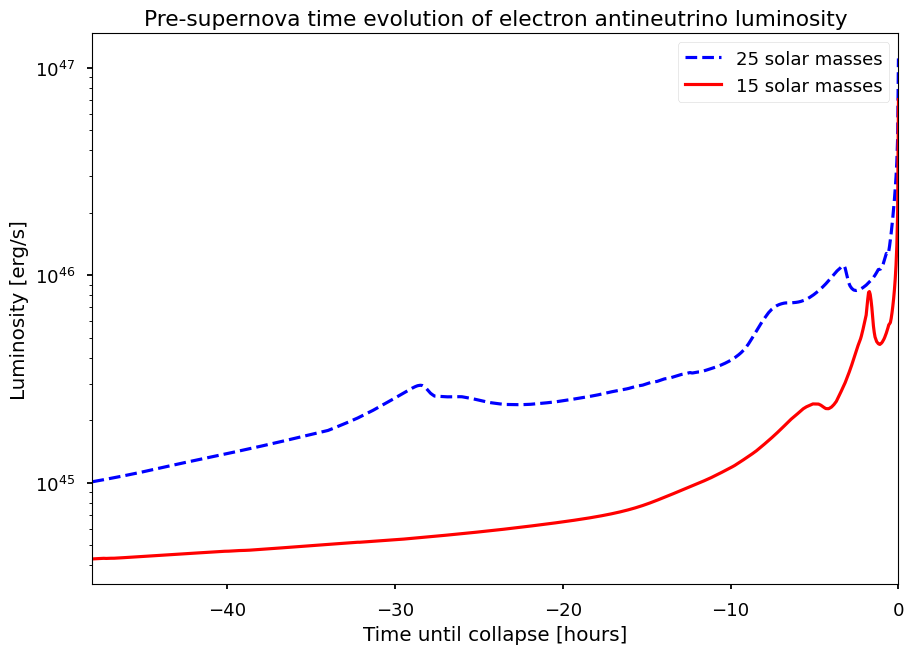

In [3]:
model_25 = presn.Odrzywolek_2010('../../models/presn-models/Odrzywolek_2010/s25_nuebar_data.txt')
model_15 = presn.Odrzywolek_2010('../../models/presn-models/Odrzywolek_2010/s15_nuebar_data.txt')
E_3 = np.linspace(0,20,201) * u.MeV #energy points for integration

width_bins = (20/201)
luminosity_time = np.linspace(-172800,-1,1000)<<u.s

luminosity_values_tot_25 = []
luminosity_values_tot_15 = []
spectra_3 = []
tot_luminosity=0

for t in luminosity_time:
    spectra = model_25.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    differential_luminosity = (spectra.get(2)[0] * (E_3)).value * 1.602 * 10**-6
    luminosity = differential_luminosity * width_bins
    tot_luminosity = np.sum(luminosity)
    luminosity_values_tot_25.append(tot_luminosity)

for t in luminosity_time:
    spectra = model_15.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    differential_luminosity = (spectra.get(2)[0] * (E_3)).value * 1.602 * 10**-6
    luminosity = differential_luminosity * width_bins
    tot_luminosity = np.sum(luminosity)
    luminosity_values_tot_15.append(tot_luminosity)


luminosity_time_3 = luminosity_time.to(u.hour)
plt.plot(luminosity_time_3,luminosity_values_tot_25, label = '25 solar masses', linestyle='dashed', color='b')
plt.plot(luminosity_time_3,luminosity_values_tot_15, label = '15 solar masses', color='r')
plt.yscale("log")
plt.legend()
plt.title('Pre-supernova time evolution of electron antineutrino luminosity')
plt.xlim(-48,0)
plt.ylabel("Luminosity [erg/s]")
plt.xlabel("Time until collapse [hours]")
plt.show()

### #2 Fig. 2 (middle): Average electron-anti neutrino energy
Decription: Time evolution of averaged anti-electron neutrino energy

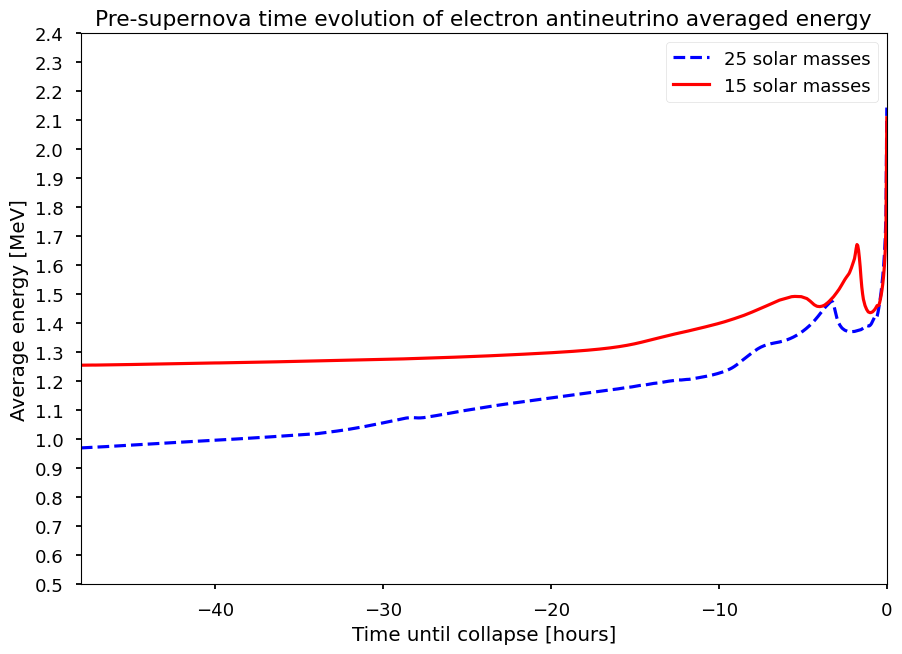

In [4]:
#IDA Figure 2 (middle) from KamLAND paper
#model_15 = presn.Odrzywolek_2010('../../models/presn-models/Odrzywolek_2010/s15_nuebar_data.txt')
E_3 = np.linspace(0,20,201) * u.MeV #energy points for integration

width_bins = (20/200)
luminosity_time = np.linspace(-172800,-1,1000)<<u.s

average_energy_25 = []
average_energy_15 = []


for t in luminosity_time:
    spectra = model_25.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    for energy in E_3:
        energy_f = (spectra.get(2)[0] * (E_3)).value
    average_energy = np.sum(energy_f) / np.sum(spectra.get(2)[0].value)
    average_energy_25.append(average_energy)


for t in luminosity_time:
    spectra = model_15.get_initial_spectra(t, E_3, flavors = [Flavor.NU_E_BAR])
    for energy in E_3:
        energy_f = (spectra.get(2)[0] * (E_3)).value
    average_energy = np.sum(energy_f) / np.sum(spectra.get(2)[0].value)
    average_energy_15.append(average_energy)



luminosity_time_3 = luminosity_time.to(u.hour)
plt.plot(luminosity_time_3, average_energy_25, label = '25 solar masses', linestyle='dashed', color='b')
plt.plot(luminosity_time_3, average_energy_15, label = '15 solar masses', color='r')
#plt.yscale("log")
plt.legend()
plt.title('Pre-supernova time evolution of electron antineutrino averaged energy')
plt.xlim(-48,0)
plt.yticks(np.arange(0.5, 2.5, 0.1))
plt.ylabel("Average energy [MeV]")
plt.xlabel("Time until collapse [hours]")
plt.show()

### #3 Fig. 4 (middle): PreSN integrated energy spectrum 48 h before collapse

In [5]:
#Copied from snowglobes usage notebook
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = None  # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "../../models/"  # directory containing SNEWPY models

In [6]:
#General parameters
# set distance in kpc
distance = 0.2

# set SNOwGLoBES detector to use
detector = "scint20kt"

# set SNEWPY model type and filename
modeltype = 'Odrzywolek_2010'

# set desired flavor transformation
transformation = 'AdiabaticMSW_NMO'
transformation_INV = 'AdiabaticMSW_IMO'

# Option 2 - specify single tstart and tend, this makes 1 fluence file integrated over the window
tstart = -172800 * u.s
tend = 0.8 * u.s

In [7]:
#15 solar masses, normal mass ordering
model = 's15_nuebar_data'
modelfile = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model + '.txt'
outfile = modeltype+"_"+model+"_"+transformation

In [8]:
#25 solar masses, normal mass ordering
model_25 = 's25_nuebar_data'
modelfile_25 = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model_25 + '.txt'
outfile_25 = modeltype+"_"+model_25+"_"+transformation

In [9]:
#15 solar masses, inverted mass ordering
model = 's15_nuebar_data'
modelfile = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model + '.txt'
outfile_INV = modeltype+"_"+model+"_"+transformation_INV

In [10]:
#25 solar masses, inverted mass ordering
model_25 = 's25_nuebar_data'
modelfile_25 = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model_25 + '.txt'
outfile_25_INV = modeltype+"_"+model_25+"_"+transformation_INV

In [11]:
#Generate 25 solar masses, inverted
print("Preparing fluences ...")
tarredfile_25_INV = snowglobes.generate_fluence(modelfile_25, modeltype, transformation_INV, distance, outfile_25_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_25_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_25_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_25_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [12]:
#Generate 15 solar masses, inverted
print("Preparing fluences ...")
tarredfile_INV = snowglobes.generate_fluence(modelfile, modeltype, transformation_INV, distance, outfile_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [13]:
#Generate 25 solar masses, normal
print("Preparing fluences ...")
tarredfile_25 = snowglobes.generate_fluence(modelfile_25, modeltype, transformation, distance, outfile_25, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_25, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_25 = snowglobes.collate(SNOwGLoBES_path, tarredfile_25, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [14]:
#Generate 15 solar masses, normal
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype, transformation, distance, outfile, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nue_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=scint20kt, channel=nuebar_e. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:16

Collating results ...


In [15]:
#Find keys
print(list(tables.keys()))

['scint20kt', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_unsmeared_weighted.dat']


In [16]:
#Use this code to print out events in each energybin for a key
key = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat'

print(f"Energy bins (in MeV):\n{tables[key]['data'][0][:12]}")

for i, channel in enumerate(tables[key]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables[key]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[  0.           0.         106.64999935 196.60997974 191.50085925
 138.73458975  85.39127823  47.65270037  24.90121     12.40059169
   5.99641111   2.83326325]
Number of nue_C12 events in those energy bins:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.82319981e-15 6.26511798e-13 3.74391690e-12]
Number of nue_C13 events in those energy bins:
[3.70902729e-02 2.68966489e-02 1.63620477e-02 9.13178880e-03
 4.76981742e-03 2.41205125e-03 1.17688367e-03 5.65802150e-04
 2.66123235e-04 1.24389113e-04 5.73604839e-05 2.64198484e-05]
Number of nuebar_C12 events in those energy bins:
[0.00000000e+00 0.00000000e+00 4.38761013e-12 4.53843466e-11
 7.24911252e-11 5.90545490e-11 3.89507308e-11 2.35520792e-11
 1.35148346e-11 7.80452813e-12 3.04712142e-12 2.94120398e-13]
Number of nc events in those 

In [17]:
#KEYS
key = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat'
key_25 = 'Collated_Odrzywolek_2010_s25_nuebar_data_AdiabaticMSW_NMO_scint20kt_events_smeared_weighted.dat'
key_INV = 'Collated_Odrzywolek_2010_s15_nuebar_data_AdiabaticMSW_IMO_scint20kt_events_smeared_weighted.dat'
key_25_INV = 'Collated_Odrzywolek_2010_s25_nuebar_data_AdiabaticMSW_IMO_scint20kt_events_smeared_weighted.dat'

Text(0, 0.5, 'dN/dE')

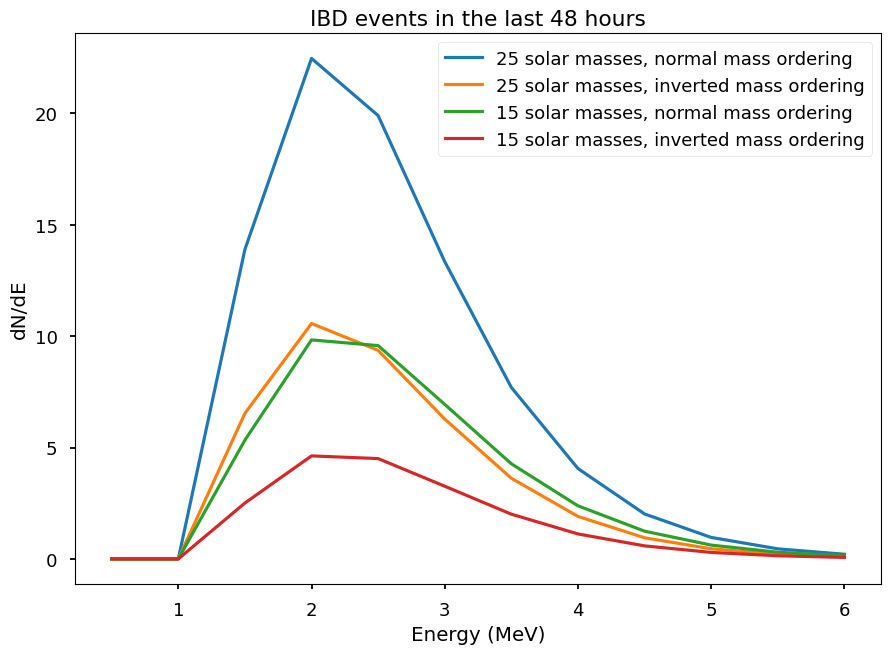

In [18]:
#25 solar masses normal
table_25 = tables_25[key_25]['data']

energy_bins_25 = table_25[0][:12] 
ibd_channel_idx_25 = None
for idx, channel in enumerate(tables_25[key_25]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_25 = idx + 1
        break

events_ibd_25 = table_25[ibd_channel_idx_25][:12]
events25_divided_by_20 = np.array(events_ibd_25) / 20.0

#25 solar masses inverted
table_25_INV = tables_25_INV[key_25_INV]['data']

energy_bins_25_INV = table_25_INV[0][:12] 
ibd_channel_idx_25_INV = None
for idx, channel in enumerate(tables_25_INV[key_25_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_25_INV = idx + 1
        break

events_ibd_25_INV = table_25_INV[ibd_channel_idx_25_INV][:12]
events25_INV_divided_by_20 = np.array(events_ibd_25_INV)/ 20.0

#15 solar masses inverted
table_INV = tables_INV[key_INV]['data']

energy_bins_INV = table_INV[0][:12] 
ibd_channel_idx_INV = None
for idx, channel in enumerate(tables_INV[key_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_INV = idx + 1
        break

events_ibd_INV = table_INV[ibd_channel_idx_INV][:12]
events_INV_divided_by_20 = np.array(events_ibd_INV) / 20.0

#15 solar masses normal
table = tables[key]['data']

energy_bins = table[0][:12] 
ibd_channel_idx = None
for idx, channel in enumerate(tables[key]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx = idx + 1
        break

events_ibd = table[ibd_channel_idx][:12]
events_divided_by_20 = np.array(events_ibd)/ 20.0

plt.title('IBD events in the last 48 hours')
plt.plot(energy_bins, events25_divided_by_20, label = '25 solar masses, normal mass ordering')
plt.plot(energy_bins, events25_INV_divided_by_20, label = '25 solar masses, inverted mass ordering')
plt.plot(energy_bins, events_divided_by_20, label = '15 solar masses, normal mass ordering')
plt.plot(energy_bins, events_INV_divided_by_20, label = '15 solar masses, inverted mass ordering')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('dN/dE')